In [1]:
import torch
import torch.nn as nn

from torchvision import datasets, models

import matplotlib.pyplot as plt


from defenses.neural_cleanse.NeuralCleanse import reverse_engineer
from trainModel import evaluate

from data_loader import get_backdoor_loader

2024-05-16 04:02:43.294676: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-16 04:02:43.352833: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-16 04:02:44.204197: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
class Opt:
    def __init__(self):

        self.dataset = 'ImageNet'
        self.cam_maps_address = './data/cam_maps.csv'
        self.trigger_type = 'camouflageTriggerCircle'
        self.target_type = 'all2one'

        self.target_label = 2

        self.inject_portion = 0.01
        
        self.batch_size = 64

        self.trig_w = 3
        self.trig_h = 3
        self.input_height = 224
        self.input_width = 224

In [9]:
opt = Opt()

In [10]:
_, train_data_bad_loader = get_backdoor_loader(opt)

==> Preparing train data..
Generating trainbad Imgs


100%|██████████| 13000/13000 [02:57<00:00, 73.36it/s]

Injecting Over: 130Bad Imgs, 12870Clean Imgs


In [11]:
train_model = torch.load('./saved_models/resnet18-whole_model-imagenet10.pth')

loss_fn = torch.nn.CrossEntropyLoss()
device = torch.device("cuda")
train_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Processing label: 0


Epoch   1: 100%|██████████| 204/204 [00:23<00:00,  8.62it/s]


norm: 1953.0203857421875


Epoch   2: 100%|██████████| 204/204 [00:27<00:00,  7.47it/s]


norm: 640.3464965820312


Epoch   3: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 556.14306640625


Epoch   4: 100%|██████████| 204/204 [00:21<00:00,  9.34it/s]


norm: 546.328857421875


Epoch   5: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 535.718994140625


Epoch   6: 100%|██████████| 204/204 [00:23<00:00,  8.60it/s]


norm: 530.5648803710938


Epoch   7: 100%|██████████| 204/204 [00:26<00:00,  7.82it/s]


norm: 522.4195556640625


Epoch   8: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 526.594482421875


Epoch   9: 100%|██████████| 204/204 [00:24<00:00,  8.49it/s]


norm: 512.0787353515625


Epoch  10: 100%|██████████| 204/204 [00:24<00:00,  8.17it/s]


norm: 511.55517578125


Epoch  11: 100%|██████████| 204/204 [00:25<00:00,  8.07it/s]


norm: 510.67449951171875


Epoch  12: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 510.3959045410156


Epoch  13: 100%|██████████| 204/204 [00:21<00:00,  9.29it/s]


norm: 510.5965576171875


Epoch  14: 100%|██████████| 204/204 [00:24<00:00,  8.18it/s]


norm: 528.051025390625


Epoch  15: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 502.2740478515625


Epoch  16: 100%|██████████| 204/204 [00:24<00:00,  8.22it/s]


norm: 502.7737121582031


Epoch  17: 100%|██████████| 204/204 [00:25<00:00,  8.00it/s]


norm: 504.23211669921875


Epoch  18: 100%|██████████| 204/204 [00:25<00:00,  8.06it/s]


norm: 492.01226806640625


Epoch  19: 100%|██████████| 204/204 [00:26<00:00,  7.61it/s]


norm: 501.25152587890625


Epoch  20: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 524.4427490234375


Epoch  21: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 496.23187255859375


Epoch  22: 100%|██████████| 204/204 [00:24<00:00,  8.49it/s]


norm: 491.9342956542969


Epoch  23: 100%|██████████| 204/204 [00:25<00:00,  8.13it/s]


norm: 521.4576416015625


Epoch  24: 100%|██████████| 204/204 [00:22<00:00,  8.92it/s]


norm: 493.65509033203125


Epoch  25: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 490.80035400390625


Epoch  26: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 487.3309020996094


Epoch  27: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 499.046875


Epoch  28: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 496.81854248046875


Epoch  29: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 487.73614501953125


Epoch  30: 100%|██████████| 204/204 [00:23<00:00,  8.72it/s]


norm: 480.1263122558594


Epoch  31: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 477.81549072265625


Epoch  32: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 484.74749755859375


Epoch  33: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 487.0951232910156


Epoch  34: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 486.69677734375


Epoch  35: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 485.43988037109375


Epoch  36: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 485.48895263671875


Epoch  37: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 486.6031494140625


Epoch  38: 100%|██████████| 204/204 [00:22<00:00,  8.94it/s]


norm: 479.7933044433594


Epoch  39: 100%|██████████| 204/204 [00:23<00:00,  8.50it/s]


norm: 487.1932373046875


Epoch  40: 100%|██████████| 204/204 [00:24<00:00,  8.16it/s]


norm: 495.98541259765625


Epoch  41: 100%|██████████| 204/204 [00:24<00:00,  8.40it/s]


norm: 490.59197998046875


Epoch  42: 100%|██████████| 204/204 [00:24<00:00,  8.17it/s]


norm: 493.8834228515625


Epoch  43: 100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


norm: 494.9564208984375


Epoch  44: 100%|██████████| 204/204 [00:23<00:00,  8.50it/s]


norm: 493.1347961425781


Epoch  45: 100%|██████████| 204/204 [00:26<00:00,  7.70it/s]


norm: 490.8837890625


Epoch  46: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 501.62176513671875


Epoch  47: 100%|██████████| 204/204 [00:26<00:00,  7.84it/s]


norm: 500.59967041015625


Epoch  48: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 494.909912109375


Epoch  49: 100%|██████████| 204/204 [00:22<00:00,  9.13it/s]


norm: 483.9992980957031


Epoch  50: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 489.70880126953125


Epoch  51: 100%|██████████| 204/204 [00:27<00:00,  7.37it/s]


norm: 506.9112548828125


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 492.6394958496094


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 495.1448059082031


Epoch  54: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 497.66473388671875


Epoch  55: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 495.6439514160156


Epoch  56: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 483.2983703613281


Epoch  57: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 492.06353759765625


Epoch  58: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 485.66009521484375


Epoch  59: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 497.88568115234375


Epoch  60: 100%|██████████| 204/204 [00:25<00:00,  8.13it/s]


norm: 484.3759765625


Epoch  61: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 487.2145080566406


Epoch  62: 100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


norm: 494.9053955078125
Processing label: 1


Epoch   1: 100%|██████████| 204/204 [00:23<00:00,  8.62it/s]


norm: 2407.09521484375


Epoch   2: 100%|██████████| 204/204 [00:24<00:00,  8.48it/s]


norm: 1054.0621337890625


Epoch   3: 100%|██████████| 204/204 [00:23<00:00,  8.51it/s]


norm: 898.1829223632812


Epoch   4: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 843.8363647460938


Epoch   5: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 822.1038818359375


Epoch   6: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


norm: 800.859130859375


Epoch   7: 100%|██████████| 204/204 [00:24<00:00,  8.27it/s]


norm: 794.975341796875


Epoch   8: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 769.9686889648438


Epoch   9: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 782.498779296875


Epoch  10: 100%|██████████| 204/204 [00:26<00:00,  7.82it/s]


norm: 783.21875


Epoch  11: 100%|██████████| 204/204 [00:22<00:00,  8.94it/s]


norm: 774.9076538085938


Epoch  12: 100%|██████████| 204/204 [00:24<00:00,  8.24it/s]


norm: 776.1827392578125


Epoch  13: 100%|██████████| 204/204 [00:25<00:00,  7.97it/s]


norm: 760.4222412109375


Epoch  14: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 761.73828125


Epoch  15: 100%|██████████| 204/204 [00:24<00:00,  8.25it/s]


norm: 761.083740234375


Epoch  16: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 754.2459716796875


Epoch  17: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 756.9320068359375


Epoch  18: 100%|██████████| 204/204 [00:24<00:00,  8.38it/s]


norm: 751.5343017578125


Epoch  19: 100%|██████████| 204/204 [00:24<00:00,  8.40it/s]


norm: 744.290283203125


Epoch  20: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 753.7235107421875


Epoch  21: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 757.43310546875


Epoch  22: 100%|██████████| 204/204 [00:22<00:00,  9.19it/s]


norm: 750.021728515625


Epoch  23: 100%|██████████| 204/204 [00:25<00:00,  8.16it/s]


norm: 753.4365234375


Epoch  24: 100%|██████████| 204/204 [00:26<00:00,  7.68it/s]


norm: 755.503662109375


Epoch  25: 100%|██████████| 204/204 [00:22<00:00,  8.99it/s]


norm: 757.1200561523438


Epoch  26: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 764.418212890625


Epoch  27: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 750.85205078125


Epoch  28: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 751.5760498046875


Epoch  29: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 751.1132202148438


Epoch  30: 100%|██████████| 204/204 [00:24<00:00,  8.46it/s]


norm: 758.5399780273438


Epoch  31: 100%|██████████| 204/204 [00:24<00:00,  8.37it/s]


norm: 751.48583984375


Epoch  32: 100%|██████████| 204/204 [00:26<00:00,  7.73it/s]


norm: 745.88427734375


Epoch  33: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 740.7999267578125


Epoch  34: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 745.61767578125


Epoch  35: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 746.5638427734375


Epoch  36: 100%|██████████| 204/204 [00:24<00:00,  8.30it/s]


norm: 750.1171264648438


Epoch  37: 100%|██████████| 204/204 [00:23<00:00,  8.54it/s]


norm: 750.0056762695312


Epoch  38: 100%|██████████| 204/204 [00:25<00:00,  8.14it/s]


norm: 744.4580078125


Epoch  39: 100%|██████████| 204/204 [00:24<00:00,  8.46it/s]


norm: 741.9785766601562


Epoch  40: 100%|██████████| 204/204 [00:24<00:00,  8.48it/s]


norm: 746.1699829101562


Epoch  41: 100%|██████████| 204/204 [00:24<00:00,  8.35it/s]


norm: 745.5672607421875


Epoch  42: 100%|██████████| 204/204 [00:25<00:00,  7.95it/s]


norm: 747.7100219726562


Epoch  43: 100%|██████████| 204/204 [00:23<00:00,  8.87it/s]


norm: 751.4218139648438


Epoch  44: 100%|██████████| 204/204 [00:23<00:00,  8.58it/s]


norm: 734.7428588867188


Epoch  45: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 746.3536987304688


Epoch  46: 100%|██████████| 204/204 [00:25<00:00,  8.09it/s]


norm: 737.2485961914062


Epoch  47: 100%|██████████| 204/204 [00:25<00:00,  8.10it/s]


norm: 745.6543579101562


Epoch  48: 100%|██████████| 204/204 [00:25<00:00,  7.89it/s]


norm: 744.4002685546875


Epoch  49: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 742.5498046875


Epoch  50: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 731.4393920898438


Epoch  51: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 736.3597412109375


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 741.77294921875


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 748.0363159179688


Epoch  54: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 748.080322265625


Epoch  55: 100%|██████████| 204/204 [00:24<00:00,  8.27it/s]


norm: 733.1552124023438


Epoch  56: 100%|██████████| 204/204 [00:24<00:00,  8.32it/s]


norm: 747.801025390625


Epoch  57: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 745.726318359375


Epoch  58: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 741.1016235351562


Epoch  59: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 738.5678100585938


Epoch  60: 100%|██████████| 204/204 [00:24<00:00,  8.28it/s]


norm: 738.9978637695312


Epoch  61: 100%|██████████| 204/204 [00:25<00:00,  8.12it/s]


norm: 756.2565307617188


Epoch  62: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 739.2688598632812


Epoch  63: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 734.8954467773438


Epoch  64: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 747.6407470703125


Epoch  65: 100%|██████████| 204/204 [00:22<00:00,  9.23it/s]


norm: 734.423095703125


Epoch  66: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 755.44580078125


Epoch  67: 100%|██████████| 204/204 [00:25<00:00,  7.89it/s]


norm: 750.63232421875


Epoch  68: 100%|██████████| 204/204 [00:25<00:00,  8.11it/s]


norm: 752.6942749023438


Epoch  69: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 741.0177612304688


Epoch  70: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 739.9229736328125


Epoch  71: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 731.5643310546875


Epoch  72: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 743.537109375


Epoch  73: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 747.2880859375


Epoch  74: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 746.5836181640625


Epoch  75: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 743.8526000976562


Epoch  76: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 752.0325317382812


Epoch  77: 100%|██████████| 204/204 [00:22<00:00,  8.95it/s]


norm: 751.0931396484375


Epoch  78: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 757.8038940429688


Epoch  79: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 748.4411010742188


Epoch  80: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 744.7679443359375


Epoch  81: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 737.075439453125
Processing label: 2


Epoch   1: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 1581.42041015625


Epoch   2: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 765.8126831054688


Epoch   3: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 697.1739501953125


Epoch   4: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 650.2387084960938


Epoch   5: 100%|██████████| 204/204 [00:24<00:00,  8.41it/s]


norm: 564.9299926757812


Epoch   6: 100%|██████████| 204/204 [00:24<00:00,  8.35it/s]


norm: 479.54205322265625


Epoch   7: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 436.2924499511719


Epoch   8: 100%|██████████| 204/204 [00:22<00:00,  9.12it/s]


norm: 396.6995544433594


Epoch   9: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 393.9125671386719


Epoch  10: 100%|██████████| 204/204 [00:24<00:00,  8.45it/s]


norm: 372.85693359375


Epoch  11: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 376.7641296386719


Epoch  12: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 372.82403564453125


Epoch  13: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 371.9084167480469


Epoch  14: 100%|██████████| 204/204 [00:26<00:00,  7.70it/s]


norm: 372.70703125


Epoch  15: 100%|██████████| 204/204 [00:24<00:00,  8.48it/s]


norm: 373.20123291015625


Epoch  16: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 373.04266357421875


Epoch  17: 100%|██████████| 204/204 [00:22<00:00,  9.03it/s]


norm: 378.809326171875


Epoch  18: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 385.16693115234375


Epoch  19: 100%|██████████| 204/204 [00:25<00:00,  7.95it/s]


norm: 368.92437744140625


Epoch  20: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 371.2496337890625


Epoch  21: 100%|██████████| 204/204 [00:23<00:00,  8.60it/s]


norm: 374.8720703125


Epoch  22: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 368.68011474609375


Epoch  23: 100%|██████████| 204/204 [00:22<00:00,  9.14it/s]


norm: 368.5826110839844


Epoch  24: 100%|██████████| 204/204 [00:21<00:00,  9.59it/s]


norm: 367.98248291015625


Epoch  25: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 378.5299072265625


Epoch  26: 100%|██████████| 204/204 [00:22<00:00,  8.94it/s]


norm: 381.0855712890625


Epoch  27: 100%|██████████| 204/204 [00:27<00:00,  7.51it/s]


norm: 374.8466796875


Epoch  28: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 365.19781494140625


Epoch  29: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 374.779296875


Epoch  30: 100%|██████████| 204/204 [00:24<00:00,  8.45it/s]


norm: 371.7138671875


Epoch  31: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 368.16357421875


Epoch  32: 100%|██████████| 204/204 [00:22<00:00,  8.87it/s]


norm: 364.02020263671875


Epoch  33: 100%|██████████| 204/204 [00:22<00:00,  8.92it/s]


norm: 370.5635070800781


Epoch  34: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 390.1659240722656


Epoch  35: 100%|██████████| 204/204 [00:22<00:00,  9.06it/s]


norm: 364.25341796875


Epoch  36: 100%|██████████| 204/204 [00:22<00:00,  9.09it/s]


norm: 364.2587890625


Epoch  37: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 364.6615295410156


Epoch  38: 100%|██████████| 204/204 [00:25<00:00,  8.07it/s]


norm: 367.62799072265625


Epoch  39: 100%|██████████| 204/204 [00:25<00:00,  7.85it/s]


norm: 365.72088623046875


Epoch  40: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 377.0807189941406


Epoch  41: 100%|██████████| 204/204 [00:22<00:00,  9.26it/s]


norm: 366.1515808105469


Epoch  42: 100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


norm: 364.339111328125


Epoch  43: 100%|██████████| 204/204 [00:24<00:00,  8.35it/s]


norm: 379.4324951171875


Epoch  44: 100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


norm: 364.82366943359375


Epoch  45: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 362.0950927734375


Epoch  46: 100%|██████████| 204/204 [00:26<00:00,  7.60it/s]


norm: 365.2914733886719


Epoch  47: 100%|██████████| 204/204 [00:22<00:00,  8.94it/s]


norm: 361.3171081542969


Epoch  48: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 362.5161437988281


Epoch  49: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 363.95440673828125


Epoch  50: 100%|██████████| 204/204 [00:25<00:00,  8.07it/s]


norm: 375.23455810546875


Epoch  51: 100%|██████████| 204/204 [00:22<00:00,  9.06it/s]


norm: 361.92047119140625


Epoch  52: 100%|██████████| 204/204 [00:27<00:00,  7.37it/s]


norm: 361.7056579589844


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 362.0626525878906


Epoch  54: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 358.5151672363281


Epoch  55: 100%|██████████| 204/204 [00:22<00:00,  9.15it/s]


norm: 362.83306884765625


Epoch  56: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 358.8901062011719


Epoch  57: 100%|██████████| 204/204 [00:20<00:00,  9.94it/s]


norm: 382.1812744140625


Epoch  58: 100%|██████████| 204/204 [00:21<00:00,  9.35it/s]


norm: 375.5573425292969


Epoch  59: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 360.7235107421875


Epoch  60: 100%|██████████| 204/204 [00:22<00:00,  9.03it/s]


norm: 358.4271545410156


Epoch  61: 100%|██████████| 204/204 [00:22<00:00,  9.13it/s]


norm: 368.7069396972656


Epoch  62: 100%|██████████| 204/204 [00:22<00:00,  9.08it/s]


norm: 374.01422119140625


Epoch  63: 100%|██████████| 204/204 [00:25<00:00,  8.15it/s]


norm: 368.7958984375


Epoch  64: 100%|██████████| 204/204 [00:23<00:00,  8.85it/s]


norm: 357.5574645996094


Epoch  65: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 357.0912170410156


Epoch  66: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 361.02874755859375


Epoch  67: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 357.6031494140625


Epoch  68: 100%|██████████| 204/204 [00:21<00:00,  9.58it/s]


norm: 360.78350830078125


Epoch  69: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 358.3253173828125


Epoch  70: 100%|██████████| 204/204 [00:24<00:00,  8.40it/s]


norm: 358.22320556640625


Epoch  71: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 385.9379577636719


Epoch  72: 100%|██████████| 204/204 [00:24<00:00,  8.49it/s]


norm: 359.6167907714844


Epoch  73: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 356.7136535644531


Epoch  74: 100%|██████████| 204/204 [00:21<00:00,  9.36it/s]


norm: 374.728271484375


Epoch  75: 100%|██████████| 204/204 [00:21<00:00,  9.34it/s]


norm: 394.0423583984375


Epoch  76: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 397.05712890625


Epoch  77: 100%|██████████| 204/204 [00:27<00:00,  7.46it/s]


norm: 388.29876708984375


Epoch  78: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 381.7651062011719


Epoch  79: 100%|██████████| 204/204 [00:22<00:00,  8.87it/s]


norm: 357.35150146484375


Epoch  80: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 358.2044982910156


Epoch  81: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 356.6318359375


Epoch  82: 100%|██████████| 204/204 [00:25<00:00,  8.09it/s]


norm: 358.298095703125


Epoch  83: 100%|██████████| 204/204 [00:22<00:00,  9.19it/s]


norm: 355.3490295410156


Epoch  84: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 356.8879089355469


Epoch  85: 100%|██████████| 204/204 [00:21<00:00,  9.33it/s]


norm: 350.591552734375


Epoch  86: 100%|██████████| 204/204 [00:21<00:00,  9.61it/s]


norm: 367.2423400878906


Epoch  87: 100%|██████████| 204/204 [00:21<00:00,  9.65it/s]


norm: 355.30560302734375


Epoch  88: 100%|██████████| 204/204 [00:21<00:00,  9.50it/s]


norm: 353.24365234375


Epoch  89: 100%|██████████| 204/204 [00:21<00:00,  9.49it/s]


norm: 352.537841796875


Epoch  90: 100%|██████████| 204/204 [00:24<00:00,  8.41it/s]


norm: 358.17205810546875


Epoch  91: 100%|██████████| 204/204 [00:25<00:00,  7.90it/s]


norm: 353.8355712890625


Epoch  92: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 354.0046081542969


Epoch  93: 100%|██████████| 204/204 [00:23<00:00,  8.72it/s]


norm: 352.10150146484375


Epoch  94: 100%|██████████| 204/204 [00:24<00:00,  8.39it/s]


norm: 353.535400390625


Epoch  95: 100%|██████████| 204/204 [00:24<00:00,  8.24it/s]


norm: 356.03515625


Epoch  96: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 365.54754638671875


Epoch  97: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 354.6849365234375


Epoch  98: 100%|██████████| 204/204 [00:24<00:00,  8.42it/s]


norm: 352.6304626464844


Epoch  99: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


norm: 360.7987365722656


Epoch 100: 100%|██████████| 204/204 [00:25<00:00,  7.92it/s]


norm: 352.842041015625
Processing label: 3


Epoch   1: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 2298.27685546875


Epoch   2: 100%|██████████| 204/204 [00:22<00:00,  8.94it/s]


norm: 918.908203125


Epoch   3: 100%|██████████| 204/204 [00:22<00:00,  8.89it/s]


norm: 768.763671875


Epoch   4: 100%|██████████| 204/204 [00:24<00:00,  8.20it/s]


norm: 729.856201171875


Epoch   5: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 701.5125122070312


Epoch   6: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 687.6829833984375


Epoch   7: 100%|██████████| 204/204 [00:21<00:00,  9.27it/s]


norm: 678.9404296875


Epoch   8: 100%|██████████| 204/204 [00:22<00:00,  9.23it/s]


norm: 659.2906494140625


Epoch   9: 100%|██████████| 204/204 [00:21<00:00,  9.46it/s]


norm: 674.5106201171875


Epoch  10: 100%|██████████| 204/204 [00:25<00:00,  7.90it/s]


norm: 655.8643798828125


Epoch  11: 100%|██████████| 204/204 [00:25<00:00,  8.06it/s]


norm: 651.7964477539062


Epoch  12: 100%|██████████| 204/204 [00:22<00:00,  8.95it/s]


norm: 657.655517578125


Epoch  13: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 641.6925659179688


Epoch  14: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 635.750244140625


Epoch  15: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 637.6373901367188


Epoch  16: 100%|██████████| 204/204 [00:25<00:00,  7.95it/s]


norm: 632.86962890625


Epoch  17: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 644.8455810546875


Epoch  18: 100%|██████████| 204/204 [00:25<00:00,  8.14it/s]


norm: 658.5770263671875


Epoch  19: 100%|██████████| 204/204 [00:22<00:00,  9.19it/s]


norm: 628.8078002929688


Epoch  20: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 625.7788696289062


Epoch  21: 100%|██████████| 204/204 [00:23<00:00,  8.56it/s]


norm: 630.0286254882812


Epoch  22: 100%|██████████| 204/204 [00:22<00:00,  9.06it/s]


norm: 655.49365234375


Epoch  23: 100%|██████████| 204/204 [00:23<00:00,  8.87it/s]


norm: 618.7647705078125


Epoch  24: 100%|██████████| 204/204 [00:22<00:00,  9.06it/s]


norm: 618.968994140625


Epoch  25: 100%|██████████| 204/204 [00:24<00:00,  8.22it/s]


norm: 623.487548828125


Epoch  26: 100%|██████████| 204/204 [00:22<00:00,  9.12it/s]


norm: 638.990234375


Epoch  27: 100%|██████████| 204/204 [00:23<00:00,  8.60it/s]


norm: 625.6849975585938


Epoch  28: 100%|██████████| 204/204 [00:22<00:00,  9.14it/s]


norm: 621.3936767578125


Epoch  29: 100%|██████████| 204/204 [00:21<00:00,  9.28it/s]


norm: 613.1806640625


Epoch  30: 100%|██████████| 204/204 [00:21<00:00,  9.60it/s]


norm: 612.904541015625


Epoch  31: 100%|██████████| 204/204 [00:21<00:00,  9.45it/s]


norm: 613.2315063476562


Epoch  32: 100%|██████████| 204/204 [00:21<00:00,  9.52it/s]


norm: 615.6142578125


Epoch  33: 100%|██████████| 204/204 [00:21<00:00,  9.50it/s]


norm: 615.8563842773438


Epoch  34: 100%|██████████| 204/204 [00:22<00:00,  9.23it/s]


norm: 621.620849609375


Epoch  35: 100%|██████████| 204/204 [00:22<00:00,  9.13it/s]


norm: 633.7750244140625


Epoch  36: 100%|██████████| 204/204 [00:22<00:00,  9.10it/s]


norm: 613.376708984375


Epoch  37: 100%|██████████| 204/204 [00:21<00:00,  9.35it/s]


norm: 609.6148681640625


Epoch  38: 100%|██████████| 204/204 [00:21<00:00,  9.52it/s]


norm: 622.4765625


Epoch  39: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 610.9822998046875


Epoch  40: 100%|██████████| 204/204 [00:27<00:00,  7.37it/s]


norm: 625.35498046875


Epoch  41: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 622.036865234375


Epoch  42: 100%|██████████| 204/204 [00:24<00:00,  8.32it/s]


norm: 616.62890625


Epoch  43: 100%|██████████| 204/204 [00:24<00:00,  8.42it/s]


norm: 616.7674560546875


Epoch  44: 100%|██████████| 204/204 [00:26<00:00,  7.79it/s]


norm: 610.2899780273438


Epoch  45: 100%|██████████| 204/204 [00:22<00:00,  9.07it/s]


norm: 612.20654296875


Epoch  46: 100%|██████████| 204/204 [00:23<00:00,  8.50it/s]


norm: 605.705322265625


Epoch  47: 100%|██████████| 204/204 [00:23<00:00,  8.53it/s]


norm: 627.1025390625


Epoch  48: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 616.1590576171875


Epoch  49: 100%|██████████| 204/204 [00:24<00:00,  8.43it/s]


norm: 609.6287841796875


Epoch  50: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 614.5767822265625


Epoch  51: 100%|██████████| 204/204 [00:22<00:00,  8.94it/s]


norm: 615.3909912109375


Epoch  52: 100%|██████████| 204/204 [00:21<00:00,  9.43it/s]


norm: 628.3923950195312


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 624.156982421875


Epoch  54: 100%|██████████| 204/204 [00:27<00:00,  7.51it/s]


norm: 627.828125


Epoch  55: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 613.411865234375


Epoch  56: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 633.2487182617188


Epoch  57: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 624.287109375


Epoch  58: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 613.37060546875


Epoch  59: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 605.1514282226562


Epoch  60: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 620.9553833007812


Epoch  61: 100%|██████████| 204/204 [00:22<00:00,  9.02it/s]


norm: 629.3702392578125


Epoch  62: 100%|██████████| 204/204 [00:23<00:00,  8.87it/s]


norm: 622.6954345703125


Epoch  63: 100%|██████████| 204/204 [00:24<00:00,  8.41it/s]


norm: 615.9506225585938


Epoch  64: 100%|██████████| 204/204 [00:22<00:00,  9.22it/s]


norm: 625.011962890625


Epoch  65: 100%|██████████| 204/204 [00:21<00:00,  9.56it/s]


norm: 606.8792724609375


Epoch  66: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 618.5203247070312


Epoch  67: 100%|██████████| 204/204 [00:20<00:00, 10.01it/s]


norm: 623.325439453125


Epoch  68: 100%|██████████| 204/204 [00:21<00:00,  9.41it/s]


norm: 613.619384765625


Epoch  69: 100%|██████████| 204/204 [00:22<00:00,  9.13it/s]


norm: 621.761962890625


Epoch  70: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 619.3973388671875


Epoch  71: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 616.150390625


Epoch  72: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 612.25


Epoch  73: 100%|██████████| 204/204 [00:24<00:00,  8.21it/s]


norm: 614.4361572265625


Epoch  74: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 617.2330932617188


Epoch  75: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 631.6810302734375


Epoch  76: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 616.3034057617188


Epoch  77: 100%|██████████| 204/204 [00:22<00:00,  8.92it/s]


norm: 609.1116943359375


Epoch  78: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 613.420654296875


Epoch  79: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 607.7191162109375


Epoch  80: 100%|██████████| 204/204 [00:24<00:00,  8.47it/s]


norm: 608.2792358398438


Epoch  81: 100%|██████████| 204/204 [00:24<00:00,  8.25it/s]


norm: 614.3145751953125


Epoch  82: 100%|██████████| 204/204 [00:24<00:00,  8.22it/s]


norm: 610.688720703125


Epoch  83: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 621.531982421875


Epoch  84: 100%|██████████| 204/204 [00:23<00:00,  8.79it/s]


norm: 622.7770385742188


Epoch  85: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 612.1033325195312


Epoch  86: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 620.2276611328125


Epoch  87: 100%|██████████| 204/204 [00:24<00:00,  8.35it/s]


norm: 628.6339111328125


Epoch  88: 100%|██████████| 204/204 [00:22<00:00,  9.19it/s]


norm: 623.8856201171875


Epoch  89: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 616.2781372070312


Epoch  90: 100%|██████████| 204/204 [00:22<00:00,  9.06it/s]


norm: 613.1405029296875
Processing label: 4


Epoch   1: 100%|██████████| 204/204 [00:22<00:00,  8.92it/s]


norm: 2275.131591796875


Epoch   2: 100%|██████████| 204/204 [00:21<00:00,  9.48it/s]


norm: 971.7531127929688


Epoch   3: 100%|██████████| 204/204 [00:21<00:00,  9.58it/s]


norm: 842.185791015625


Epoch   4: 100%|██████████| 204/204 [00:22<00:00,  9.13it/s]


norm: 787.3818359375


Epoch   5: 100%|██████████| 204/204 [00:27<00:00,  7.45it/s]


norm: 777.6653442382812


Epoch   6: 100%|██████████| 204/204 [00:23<00:00,  8.72it/s]


norm: 773.7037353515625


Epoch   7: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 741.2919921875


Epoch   8: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 742.6524658203125


Epoch   9: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 732.7535400390625


Epoch  10: 100%|██████████| 204/204 [00:20<00:00,  9.79it/s]


norm: 729.6923217773438


Epoch  11: 100%|██████████| 204/204 [00:22<00:00,  9.16it/s]


norm: 720.92138671875


Epoch  12: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 708.74267578125


Epoch  13: 100%|██████████| 204/204 [00:21<00:00,  9.46it/s]


norm: 713.3382568359375


Epoch  14: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 703.466064453125


Epoch  15: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 707.542236328125


Epoch  16: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 701.947021484375


Epoch  17: 100%|██████████| 204/204 [00:21<00:00,  9.48it/s]


norm: 689.8960571289062


Epoch  18: 100%|██████████| 204/204 [00:20<00:00,  9.87it/s]


norm: 694.663818359375


Epoch  19: 100%|██████████| 204/204 [00:21<00:00,  9.34it/s]


norm: 674.8316650390625


Epoch  20: 100%|██████████| 204/204 [00:23<00:00,  8.85it/s]


norm: 673.311767578125


Epoch  21: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 667.4437866210938


Epoch  22: 100%|██████████| 204/204 [00:21<00:00,  9.43it/s]


norm: 689.3345947265625


Epoch  23: 100%|██████████| 204/204 [00:22<00:00,  9.03it/s]


norm: 664.219970703125


Epoch  24: 100%|██████████| 204/204 [00:21<00:00,  9.42it/s]


norm: 661.9442749023438


Epoch  25: 100%|██████████| 204/204 [00:20<00:00,  9.94it/s]


norm: 675.909912109375


Epoch  26: 100%|██████████| 204/204 [00:20<00:00,  9.72it/s]


norm: 673.572998046875


Epoch  27: 100%|██████████| 204/204 [00:21<00:00,  9.40it/s]


norm: 657.63818359375


Epoch  28: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 667.5034790039062


Epoch  29: 100%|██████████| 204/204 [00:26<00:00,  7.58it/s]


norm: 664.78662109375


Epoch  30: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 667.3751831054688


Epoch  31: 100%|██████████| 204/204 [00:23<00:00,  8.85it/s]


norm: 667.3192138671875


Epoch  32: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 659.3060302734375


Epoch  33: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 655.9493408203125


Epoch  34: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 657.4031372070312


Epoch  35: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 647.6294555664062


Epoch  36: 100%|██████████| 204/204 [00:24<00:00,  8.49it/s]


norm: 652.876708984375


Epoch  37: 100%|██████████| 204/204 [00:24<00:00,  8.47it/s]


norm: 662.9591064453125


Epoch  38: 100%|██████████| 204/204 [00:21<00:00,  9.35it/s]


norm: 656.389404296875


Epoch  39: 100%|██████████| 204/204 [00:21<00:00,  9.51it/s]


norm: 659.5400390625


Epoch  40: 100%|██████████| 204/204 [00:21<00:00,  9.31it/s]


norm: 648.8880615234375


Epoch  41: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 664.5769653320312


Epoch  42: 100%|██████████| 204/204 [00:22<00:00,  9.18it/s]


norm: 651.0476684570312


Epoch  43: 100%|██████████| 204/204 [00:21<00:00,  9.47it/s]


norm: 649.838134765625


Epoch  44: 100%|██████████| 204/204 [00:20<00:00,  9.89it/s]


norm: 661.2901611328125


Epoch  45: 100%|██████████| 204/204 [00:21<00:00,  9.48it/s]


norm: 653.8106689453125


Epoch  46: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 645.9495239257812


Epoch  47: 100%|██████████| 204/204 [00:24<00:00,  8.27it/s]


norm: 655.56787109375


Epoch  48: 100%|██████████| 204/204 [00:24<00:00,  8.44it/s]


norm: 677.4132080078125


Epoch  49: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 662.6055297851562


Epoch  50: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 652.6582641601562


Epoch  51: 100%|██████████| 204/204 [00:22<00:00,  8.89it/s]


norm: 650.5870361328125


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.62it/s]


norm: 646.1189575195312


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 649.2667236328125


Epoch  54: 100%|██████████| 204/204 [00:22<00:00,  9.12it/s]


norm: 661.5151977539062


Epoch  55: 100%|██████████| 204/204 [00:22<00:00,  9.14it/s]


norm: 658.0654296875


Epoch  56: 100%|██████████| 204/204 [00:26<00:00,  7.80it/s]


norm: 656.561767578125


Epoch  57: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 654.2710571289062


Epoch  58: 100%|██████████| 204/204 [00:24<00:00,  8.47it/s]


norm: 663.7821044921875


Epoch  59: 100%|██████████| 204/204 [00:22<00:00,  8.89it/s]


norm: 645.7553100585938


Epoch  60: 100%|██████████| 204/204 [00:22<00:00,  8.95it/s]


norm: 669.683349609375


Epoch  61: 100%|██████████| 204/204 [00:23<00:00,  8.87it/s]


norm: 652.8729248046875


Epoch  62: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 648.777587890625


Epoch  63: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 654.4214477539062


Epoch  64: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 669.827880859375


Epoch  65: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 653.007080078125


Epoch  66: 100%|██████████| 204/204 [00:23<00:00,  8.55it/s]


norm: 642.4453125


Epoch  67: 100%|██████████| 204/204 [00:23<00:00,  8.79it/s]


norm: 645.0850219726562


Epoch  68: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 645.8856811523438


Epoch  69: 100%|██████████| 204/204 [00:23<00:00,  8.72it/s]


norm: 644.5812377929688


Epoch  70: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 652.74609375


Epoch  71: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 652.7972412109375


Epoch  72: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 649.8473510742188


Epoch  73: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 644.4746704101562


Epoch  74: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 652.7037353515625


Epoch  75: 100%|██████████| 204/204 [00:22<00:00,  9.22it/s]


norm: 648.4661865234375


Epoch  76: 100%|██████████| 204/204 [00:22<00:00,  9.26it/s]


norm: 648.2099609375


Epoch  77: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 667.6024780273438


Epoch  78: 100%|██████████| 204/204 [00:26<00:00,  7.57it/s]


norm: 647.24072265625


Epoch  79: 100%|██████████| 204/204 [00:23<00:00,  8.54it/s]


norm: 649.97998046875


Epoch  80: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 651.5767211914062


Epoch  81: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 660.8821411132812


Epoch  82: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 641.707275390625


Epoch  83: 100%|██████████| 204/204 [00:22<00:00,  8.95it/s]


norm: 655.5930786132812


Epoch  84: 100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


norm: 648.6527099609375


Epoch  85: 100%|██████████| 204/204 [00:21<00:00,  9.32it/s]


norm: 662.4512329101562


Epoch  86: 100%|██████████| 204/204 [00:22<00:00,  9.20it/s]


norm: 650.7086181640625


Epoch  87: 100%|██████████| 204/204 [00:25<00:00,  7.95it/s]


norm: 652.7048950195312


Epoch  88: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 649.2958984375


Epoch  89: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 662.2051391601562


Epoch  90: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 639.3082885742188


Epoch  91: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 645.5518798828125


Epoch  92: 100%|██████████| 204/204 [00:21<00:00,  9.28it/s]


norm: 646.5670166015625


Epoch  93: 100%|██████████| 204/204 [00:25<00:00,  7.91it/s]


norm: 657.2555541992188


Epoch  94: 100%|██████████| 204/204 [00:22<00:00,  8.87it/s]


norm: 648.909423828125


Epoch  95: 100%|██████████| 204/204 [00:24<00:00,  8.43it/s]


norm: 669.5831909179688


Epoch  96: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 634.27001953125


Epoch  97: 100%|██████████| 204/204 [00:24<00:00,  8.44it/s]


norm: 666.591552734375


Epoch  98: 100%|██████████| 204/204 [00:22<00:00,  8.87it/s]


norm: 642.5811767578125


Epoch  99: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 647.5322265625


Epoch 100: 100%|██████████| 204/204 [00:23<00:00,  8.51it/s]


norm: 649.811767578125
Processing label: 5


Epoch   1: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 2042.841064453125


Epoch   2: 100%|██████████| 204/204 [00:21<00:00,  9.53it/s]


norm: 819.1356201171875


Epoch   3: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 707.1544799804688


Epoch   4: 100%|██████████| 204/204 [00:25<00:00,  7.90it/s]


norm: 663.04443359375


Epoch   5: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 658.4491577148438


Epoch   6: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 639.2435302734375


Epoch   7: 100%|██████████| 204/204 [00:25<00:00,  8.10it/s]


norm: 619.1934814453125


Epoch   8: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 623.82373046875


Epoch   9: 100%|██████████| 204/204 [00:24<00:00,  8.35it/s]


norm: 603.388427734375


Epoch  10: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 622.9156494140625


Epoch  11: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 604.4449462890625


Epoch  12: 100%|██████████| 204/204 [00:25<00:00,  8.07it/s]


norm: 601.2135009765625


Epoch  13: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 594.07373046875


Epoch  14: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 603.1669921875


Epoch  15: 100%|██████████| 204/204 [00:24<00:00,  8.37it/s]


norm: 596.5496826171875


Epoch  16: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 587.8660888671875


Epoch  17: 100%|██████████| 204/204 [00:22<00:00,  9.16it/s]


norm: 588.7888793945312


Epoch  18: 100%|██████████| 204/204 [00:21<00:00,  9.40it/s]


norm: 576.150146484375


Epoch  19: 100%|██████████| 204/204 [00:21<00:00,  9.53it/s]


norm: 574.1950073242188


Epoch  20: 100%|██████████| 204/204 [00:22<00:00,  9.21it/s]


norm: 574.326416015625


Epoch  21: 100%|██████████| 204/204 [00:24<00:00,  8.44it/s]


norm: 569.1334228515625


Epoch  22: 100%|██████████| 204/204 [00:23<00:00,  8.54it/s]


norm: 571.1282958984375


Epoch  23: 100%|██████████| 204/204 [00:23<00:00,  8.87it/s]


norm: 561.76953125


Epoch  24: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 562.0387573242188


Epoch  25: 100%|██████████| 204/204 [00:22<00:00,  9.09it/s]


norm: 569.5233154296875


Epoch  26: 100%|██████████| 204/204 [00:21<00:00,  9.46it/s]


norm: 555.174560546875


Epoch  27: 100%|██████████| 204/204 [00:22<00:00,  9.08it/s]


norm: 555.80908203125


Epoch  28: 100%|██████████| 204/204 [00:21<00:00,  9.44it/s]


norm: 562.8873291015625


Epoch  29: 100%|██████████| 204/204 [00:21<00:00,  9.30it/s]


norm: 566.12744140625


Epoch  30: 100%|██████████| 204/204 [00:21<00:00,  9.60it/s]


norm: 578.5302124023438


Epoch  31: 100%|██████████| 204/204 [00:21<00:00,  9.61it/s]


norm: 553.9430541992188


Epoch  32: 100%|██████████| 204/204 [00:20<00:00,  9.78it/s]


norm: 561.6748046875


Epoch  33: 100%|██████████| 204/204 [00:20<00:00,  9.79it/s]


norm: 554.7388916015625


Epoch  34: 100%|██████████| 204/204 [00:20<00:00,  9.99it/s]


norm: 575.263916015625


Epoch  35: 100%|██████████| 204/204 [00:21<00:00,  9.44it/s]


norm: 546.9908447265625


Epoch  36: 100%|██████████| 204/204 [00:20<00:00,  9.90it/s]


norm: 555.1107788085938


Epoch  37: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 563.3160400390625


Epoch  38: 100%|██████████| 204/204 [00:26<00:00,  7.74it/s]


norm: 550.7885131835938


Epoch  39: 100%|██████████| 204/204 [00:23<00:00,  8.87it/s]


norm: 542.9423828125


Epoch  40: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 548.7806396484375


Epoch  41: 100%|██████████| 204/204 [00:22<00:00,  9.02it/s]


norm: 547.5575561523438


Epoch  42: 100%|██████████| 204/204 [00:20<00:00,  9.73it/s]


norm: 548.9078369140625


Epoch  43: 100%|██████████| 204/204 [00:22<00:00,  9.27it/s]


norm: 550.5291748046875


Epoch  44: 100%|██████████| 204/204 [00:25<00:00,  8.01it/s]


norm: 544.44580078125


Epoch  45: 100%|██████████| 204/204 [00:21<00:00,  9.28it/s]


norm: 547.1713256835938


Epoch  46: 100%|██████████| 204/204 [00:22<00:00,  9.03it/s]


norm: 551.648681640625


Epoch  47: 100%|██████████| 204/204 [00:21<00:00,  9.35it/s]


norm: 546.178466796875


Epoch  48: 100%|██████████| 204/204 [00:25<00:00,  7.93it/s]


norm: 542.98291015625


Epoch  49: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 552.7640380859375


Epoch  50: 100%|██████████| 204/204 [00:22<00:00,  9.10it/s]


norm: 575.6514282226562


Epoch  51: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 541.8612060546875


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 542.0855102539062


Epoch  53: 100%|██████████| 204/204 [00:22<00:00,  8.99it/s]


norm: 549.2144775390625


Epoch  54: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 535.9572143554688


Epoch  55: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 544.583984375


Epoch  56: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 541.087890625


Epoch  57: 100%|██████████| 204/204 [00:22<00:00,  9.08it/s]


norm: 540.5147705078125


Epoch  58: 100%|██████████| 204/204 [00:21<00:00,  9.33it/s]


norm: 549.0667724609375


Epoch  59: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 538.977294921875


Epoch  60: 100%|██████████| 204/204 [00:25<00:00,  7.89it/s]


norm: 544.0146484375


Epoch  61: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 548.2516479492188


Epoch  62: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 544.2645263671875


Epoch  63: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 551.5792236328125


Epoch  64: 100%|██████████| 204/204 [00:22<00:00,  9.14it/s]


norm: 548.284912109375


Epoch  65: 100%|██████████| 204/204 [00:21<00:00,  9.28it/s]


norm: 551.5220947265625


Epoch  66: 100%|██████████| 204/204 [00:21<00:00,  9.36it/s]


norm: 555.280029296875


Epoch  67: 100%|██████████| 204/204 [00:22<00:00,  8.99it/s]


norm: 556.234130859375


Epoch  68: 100%|██████████| 204/204 [00:22<00:00,  9.08it/s]


norm: 541.8837890625


Epoch  69: 100%|██████████| 204/204 [00:22<00:00,  9.10it/s]


norm: 542.3748168945312


Epoch  70: 100%|██████████| 204/204 [00:23<00:00,  8.85it/s]


norm: 542.874755859375


Epoch  71: 100%|██████████| 204/204 [00:26<00:00,  7.72it/s]


norm: 539.8035888671875


Epoch  72: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 555.1283569335938


Epoch  73: 100%|██████████| 204/204 [00:23<00:00,  8.51it/s]


norm: 538.0721435546875


Epoch  74: 100%|██████████| 204/204 [00:24<00:00,  8.24it/s]


norm: 558.15869140625


Epoch  75: 100%|██████████| 204/204 [00:22<00:00,  8.95it/s]


norm: 550.8868408203125


Epoch  76: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 540.81494140625


Epoch  77: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 553.1397094726562


Epoch  78: 100%|██████████| 204/204 [00:24<00:00,  8.34it/s]


norm: 551.2921142578125


Epoch  79: 100%|██████████| 204/204 [00:24<00:00,  8.29it/s]


norm: 544.0525512695312


Epoch  80: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 539.721923828125


Epoch  81: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 538.1696166992188


Epoch  82: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 541.0282592773438


Epoch  83: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 548.4329833984375


Epoch  84: 100%|██████████| 204/204 [00:24<00:00,  8.47it/s]


norm: 549.2421264648438


Epoch  85: 100%|██████████| 204/204 [00:24<00:00,  8.50it/s]


norm: 539.2926635742188
Processing label: 6


Epoch   1: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 2143.7021484375


Epoch   2: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 880.3306884765625


Epoch   3: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 721.449951171875


Epoch   4: 100%|██████████| 204/204 [00:24<00:00,  8.45it/s]


norm: 657.5396118164062


Epoch   5: 100%|██████████| 204/204 [00:23<00:00,  8.79it/s]


norm: 653.1228637695312


Epoch   6: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 624.097412109375


Epoch   7: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 603.70263671875


Epoch   8: 100%|██████████| 204/204 [00:23<00:00,  8.72it/s]


norm: 598.2313842773438


Epoch   9: 100%|██████████| 204/204 [00:22<00:00,  9.26it/s]


norm: 595.4197387695312


Epoch  10: 100%|██████████| 204/204 [00:21<00:00,  9.62it/s]


norm: 596.3095703125


Epoch  11: 100%|██████████| 204/204 [00:21<00:00,  9.29it/s]


norm: 585.3187255859375


Epoch  12: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 591.349609375


Epoch  13: 100%|██████████| 204/204 [00:25<00:00,  8.04it/s]


norm: 576.8394165039062


Epoch  14: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 573.8456420898438


Epoch  15: 100%|██████████| 204/204 [00:22<00:00,  8.87it/s]


norm: 574.7587890625


Epoch  16: 100%|██████████| 204/204 [00:23<00:00,  8.50it/s]


norm: 576.785400390625


Epoch  17: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 577.4564208984375


Epoch  18: 100%|██████████| 204/204 [00:25<00:00,  7.94it/s]


norm: 591.349365234375


Epoch  19: 100%|██████████| 204/204 [00:22<00:00,  9.03it/s]


norm: 570.389892578125


Epoch  20: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 572.7744140625


Epoch  21: 100%|██████████| 204/204 [00:21<00:00,  9.41it/s]


norm: 572.0621337890625


Epoch  22: 100%|██████████| 204/204 [00:22<00:00,  9.27it/s]


norm: 565.5909423828125


Epoch  23: 100%|██████████| 204/204 [00:26<00:00,  7.84it/s]


norm: 568.359130859375


Epoch  24: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 565.9891357421875


Epoch  25: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 566.6585693359375


Epoch  26: 100%|██████████| 204/204 [00:23<00:00,  8.79it/s]


norm: 565.45166015625


Epoch  27: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 565.3486328125


Epoch  28: 100%|██████████| 204/204 [00:23<00:00,  8.50it/s]


norm: 568.782958984375


Epoch  29: 100%|██████████| 204/204 [00:22<00:00,  9.24it/s]


norm: 576.4923095703125


Epoch  30: 100%|██████████| 204/204 [00:21<00:00,  9.40it/s]


norm: 574.0482177734375


Epoch  31: 100%|██████████| 204/204 [00:21<00:00,  9.41it/s]


norm: 587.68310546875


Epoch  32: 100%|██████████| 204/204 [00:21<00:00,  9.62it/s]


norm: 566.0508422851562


Epoch  33: 100%|██████████| 204/204 [00:21<00:00,  9.54it/s]


norm: 571.5814208984375


Epoch  34: 100%|██████████| 204/204 [00:21<00:00,  9.63it/s]


norm: 562.6893920898438


Epoch  35: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 564.1249389648438


Epoch  36: 100%|██████████| 204/204 [00:25<00:00,  7.96it/s]


norm: 574.5970458984375


Epoch  37: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 569.7476806640625


Epoch  38: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 567.139404296875


Epoch  39: 100%|██████████| 204/204 [00:23<00:00,  8.60it/s]


norm: 569.5137939453125


Epoch  40: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 562.3416748046875


Epoch  41: 100%|██████████| 204/204 [00:24<00:00,  8.45it/s]


norm: 569.3916625976562


Epoch  42: 100%|██████████| 204/204 [00:21<00:00,  9.32it/s]


norm: 567.5911865234375


Epoch  43: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 577.3310546875


Epoch  44: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 587.215576171875


Epoch  45: 100%|██████████| 204/204 [00:21<00:00,  9.64it/s]


norm: 569.8074340820312


Epoch  46: 100%|██████████| 204/204 [00:21<00:00,  9.40it/s]


norm: 555.88427734375


Epoch  47: 100%|██████████| 204/204 [00:22<00:00,  9.24it/s]


norm: 573.3250732421875


Epoch  48: 100%|██████████| 204/204 [00:25<00:00,  8.00it/s]


norm: 577.6861572265625


Epoch  49: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 569.2117919921875


Epoch  50: 100%|██████████| 204/204 [00:23<00:00,  8.54it/s]


norm: 575.21826171875


Epoch  51: 100%|██████████| 204/204 [00:23<00:00,  8.55it/s]


norm: 568.343994140625


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 570.4056396484375


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 587.6386108398438


Epoch  54: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 563.4525146484375


Epoch  55: 100%|██████████| 204/204 [00:23<00:00,  8.79it/s]


norm: 568.9523315429688


Epoch  56: 100%|██████████| 204/204 [00:22<00:00,  8.95it/s]


norm: 564.6245727539062


Epoch  57: 100%|██████████| 204/204 [00:23<00:00,  8.55it/s]


norm: 569.6228637695312


Epoch  58: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 577.8250122070312


Epoch  59: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 576.5382080078125


Epoch  60: 100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


norm: 567.4901123046875


Epoch  61: 100%|██████████| 204/204 [00:22<00:00,  8.94it/s]


norm: 574.5703125


Epoch  62: 100%|██████████| 204/204 [00:23<00:00,  8.79it/s]


norm: 571.564453125


Epoch  63: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 565.7651977539062


Epoch  64: 100%|██████████| 204/204 [00:24<00:00,  8.29it/s]


norm: 569.74365234375


Epoch  65: 100%|██████████| 204/204 [00:24<00:00,  8.29it/s]


norm: 585.0816650390625


Epoch  66: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 564.2438354492188


Epoch  67: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 581.0304565429688


Epoch  68: 100%|██████████| 204/204 [00:23<00:00,  8.79it/s]


norm: 565.7998657226562


Epoch  69: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 565.01708984375


Epoch  70: 100%|██████████| 204/204 [00:23<00:00,  8.55it/s]


norm: 572.7709350585938


Epoch  71: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 575.9490356445312


Epoch  72: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 567.477294921875


Epoch  73: 100%|██████████| 204/204 [00:22<00:00,  9.14it/s]


norm: 560.1278686523438


Epoch  74: 100%|██████████| 204/204 [00:22<00:00,  9.19it/s]


norm: 554.531494140625


Epoch  75: 100%|██████████| 204/204 [00:23<00:00,  8.56it/s]


norm: 562.8653564453125


Epoch  76: 100%|██████████| 204/204 [00:22<00:00,  9.09it/s]


norm: 555.4715576171875


Epoch  77: 100%|██████████| 204/204 [00:22<00:00,  9.07it/s]


norm: 555.584228515625


Epoch  78: 100%|██████████| 204/204 [00:22<00:00,  9.09it/s]


norm: 576.4636840820312


Epoch  79: 100%|██████████| 204/204 [00:22<00:00,  9.16it/s]


norm: 575.6051025390625


Epoch  80: 100%|██████████| 204/204 [00:21<00:00,  9.33it/s]


norm: 570.5347900390625


Epoch  81: 100%|██████████| 204/204 [00:21<00:00,  9.33it/s]


norm: 560.6253662109375


Epoch  82: 100%|██████████| 204/204 [00:21<00:00,  9.35it/s]


norm: 580.404541015625


Epoch  83: 100%|██████████| 204/204 [00:22<00:00,  9.25it/s]


norm: 581.083984375


Epoch  84: 100%|██████████| 204/204 [00:21<00:00,  9.51it/s]


norm: 566.114501953125


Epoch  85: 100%|██████████| 204/204 [00:22<00:00,  9.24it/s]


norm: 578.3347778320312


Epoch  86: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 558.5897216796875


Epoch  87: 100%|██████████| 204/204 [00:25<00:00,  8.07it/s]


norm: 576.3200073242188


Epoch  88: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 571.5364379882812


Epoch  89: 100%|██████████| 204/204 [00:23<00:00,  8.51it/s]


norm: 556.646728515625


Epoch  90: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 573.6736450195312


Epoch  91: 100%|██████████| 204/204 [00:22<00:00,  8.89it/s]


norm: 558.7972412109375


Epoch  92: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 559.54296875


Epoch  93: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 566.8770141601562


Epoch  94: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 577.0455322265625


Epoch  95: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 561.29052734375


Epoch  96: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 557.433837890625


Epoch  97: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 570.3740844726562


Epoch  98: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 560.4605102539062


Epoch  99: 100%|██████████| 204/204 [00:22<00:00,  8.95it/s]


norm: 560.1165771484375


Epoch 100: 100%|██████████| 204/204 [00:24<00:00,  8.48it/s]


norm: 581.9513549804688
Processing label: 7


Epoch   1: 100%|██████████| 204/204 [00:22<00:00,  9.21it/s]


norm: 2444.041259765625


Epoch   2: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 978.3948974609375


Epoch   3: 100%|██████████| 204/204 [00:21<00:00,  9.39it/s]


norm: 786.5440673828125


Epoch   4: 100%|██████████| 204/204 [00:21<00:00,  9.60it/s]


norm: 741.5834350585938


Epoch   5: 100%|██████████| 204/204 [00:21<00:00,  9.64it/s]


norm: 732.64599609375


Epoch   6: 100%|██████████| 204/204 [00:20<00:00,  9.87it/s]


norm: 701.45849609375


Epoch   7: 100%|██████████| 204/204 [00:21<00:00,  9.49it/s]


norm: 689.8912963867188


Epoch   8: 100%|██████████| 204/204 [00:21<00:00,  9.59it/s]


norm: 683.4283447265625


Epoch   9: 100%|██████████| 204/204 [00:21<00:00,  9.31it/s]


norm: 672.1451416015625


Epoch  10: 100%|██████████| 204/204 [00:24<00:00,  8.44it/s]


norm: 661.9354248046875


Epoch  11: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 660.5008544921875


Epoch  12: 100%|██████████| 204/204 [00:22<00:00,  9.03it/s]


norm: 670.331787109375


Epoch  13: 100%|██████████| 204/204 [00:20<00:00,  9.72it/s]


norm: 670.150146484375


Epoch  14: 100%|██████████| 204/204 [00:20<00:00,  9.85it/s]


norm: 651.0790405273438


Epoch  15: 100%|██████████| 204/204 [00:21<00:00,  9.51it/s]


norm: 643.2828369140625


Epoch  16: 100%|██████████| 204/204 [00:24<00:00,  8.44it/s]


norm: 633.2365112304688


Epoch  17: 100%|██████████| 204/204 [00:24<00:00,  8.35it/s]


norm: 632.2161254882812


Epoch  18: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 625.4718627929688


Epoch  19: 100%|██████████| 204/204 [00:23<00:00,  8.55it/s]


norm: 628.3421020507812


Epoch  20: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 621.1311645507812


Epoch  21: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 629.5054931640625


Epoch  22: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 616.9805908203125


Epoch  23: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 624.3892822265625


Epoch  24: 100%|██████████| 204/204 [00:21<00:00,  9.55it/s]


norm: 615.9522094726562


Epoch  25: 100%|██████████| 204/204 [00:21<00:00,  9.35it/s]


norm: 606.5101318359375


Epoch  26: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 597.503662109375


Epoch  27: 100%|██████████| 204/204 [00:25<00:00,  8.04it/s]


norm: 612.0331420898438


Epoch  28: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 605.6871337890625


Epoch  29: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 609.4898681640625


Epoch  30: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 609.3535766601562


Epoch  31: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 610.7185668945312


Epoch  32: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 620.5758056640625


Epoch  33: 100%|██████████| 204/204 [00:23<00:00,  8.54it/s]


norm: 591.2485961914062


Epoch  34: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 590.2715454101562


Epoch  35: 100%|██████████| 204/204 [00:22<00:00,  8.89it/s]


norm: 585.4630737304688


Epoch  36: 100%|██████████| 204/204 [00:21<00:00,  9.60it/s]


norm: 593.1961669921875


Epoch  37: 100%|██████████| 204/204 [00:20<00:00,  9.83it/s]


norm: 589.6380615234375


Epoch  38: 100%|██████████| 204/204 [00:21<00:00,  9.32it/s]


norm: 585.42919921875


Epoch  39: 100%|██████████| 204/204 [00:22<00:00,  9.27it/s]


norm: 592.88818359375


Epoch  40: 100%|██████████| 204/204 [00:21<00:00,  9.50it/s]


norm: 614.1514892578125


Epoch  41: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 582.7539672851562


Epoch  42: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 589.0982666015625


Epoch  43: 100%|██████████| 204/204 [00:20<00:00,  9.80it/s]


norm: 587.31103515625


Epoch  44: 100%|██████████| 204/204 [00:21<00:00,  9.45it/s]


norm: 591.67919921875


Epoch  45: 100%|██████████| 204/204 [00:25<00:00,  8.09it/s]


norm: 587.2455444335938


Epoch  46: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 589.8756103515625


Epoch  47: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 587.1892700195312


Epoch  48: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 582.3298950195312


Epoch  49: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 593.2293701171875


Epoch  50: 100%|██████████| 204/204 [00:24<00:00,  8.37it/s]


norm: 593.821533203125


Epoch  51: 100%|██████████| 204/204 [00:22<00:00,  9.15it/s]


norm: 597.3033447265625


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.86it/s]


norm: 586.603759765625


Epoch  53: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 596.8726806640625


Epoch  54: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 582.2802734375


Epoch  55: 100%|██████████| 204/204 [00:24<00:00,  8.47it/s]


norm: 586.7374877929688


Epoch  56: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 592.0829467773438


Epoch  57: 100%|██████████| 204/204 [00:21<00:00,  9.56it/s]


norm: 591.3541259765625


Epoch  58: 100%|██████████| 204/204 [00:21<00:00,  9.64it/s]


norm: 583.0980224609375


Epoch  59: 100%|██████████| 204/204 [00:21<00:00,  9.38it/s]


norm: 588.9063110351562


Epoch  60: 100%|██████████| 204/204 [00:21<00:00,  9.51it/s]


norm: 589.6934814453125


Epoch  61: 100%|██████████| 204/204 [00:21<00:00,  9.70it/s]


norm: 608.46533203125


Epoch  62: 100%|██████████| 204/204 [00:21<00:00,  9.51it/s]


norm: 584.2081909179688


Epoch  63: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 589.0723266601562


Epoch  64: 100%|██████████| 204/204 [00:24<00:00,  8.40it/s]


norm: 583.1146240234375


Epoch  65: 100%|██████████| 204/204 [00:22<00:00,  9.27it/s]


norm: 598.93017578125


Epoch  66: 100%|██████████| 204/204 [00:22<00:00,  9.03it/s]


norm: 603.3492431640625


Epoch  67: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 593.5296020507812


Epoch  68: 100%|██████████| 204/204 [00:23<00:00,  8.51it/s]


norm: 588.69482421875


Epoch  69: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 581.6883544921875


Epoch  70: 100%|██████████| 204/204 [00:24<00:00,  8.44it/s]


norm: 591.0205078125


Epoch  71: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 593.0233154296875


Epoch  72: 100%|██████████| 204/204 [00:24<00:00,  8.23it/s]


norm: 581.4849853515625


Epoch  73: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 595.049560546875


Epoch  74: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 581.987548828125


Epoch  75: 100%|██████████| 204/204 [00:24<00:00,  8.50it/s]


norm: 596.55224609375


Epoch  76: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 591.57421875


Epoch  77: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 587.6393432617188


Epoch  78: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 593.1177978515625


Epoch  79: 100%|██████████| 204/204 [00:26<00:00,  7.85it/s]


norm: 586.0778198242188


Epoch  80: 100%|██████████| 204/204 [00:23<00:00,  8.57it/s]


norm: 587.4037475585938


Epoch  81: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 598.2801513671875


Epoch  82: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 581.6205444335938


Epoch  83: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 588.1337890625


Epoch  84: 100%|██████████| 204/204 [00:23<00:00,  8.87it/s]


norm: 604.7767333984375


Epoch  85: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 591.6204223632812


Epoch  86: 100%|██████████| 204/204 [00:21<00:00,  9.47it/s]


norm: 594.067626953125


Epoch  87: 100%|██████████| 204/204 [00:22<00:00,  9.25it/s]


norm: 585.5761108398438


Epoch  88: 100%|██████████| 204/204 [00:25<00:00,  8.05it/s]


norm: 597.74609375


Epoch  89: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 596.0477294921875


Epoch  90: 100%|██████████| 204/204 [00:23<00:00,  8.58it/s]


norm: 586.5929565429688


Epoch  91: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 594.9427490234375


Epoch  92: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 601.7696533203125


Epoch  93: 100%|██████████| 204/204 [00:22<00:00,  9.23it/s]


norm: 583.330078125


Epoch  94: 100%|██████████| 204/204 [00:21<00:00,  9.45it/s]


norm: 582.5451049804688


Epoch  95: 100%|██████████| 204/204 [00:21<00:00,  9.66it/s]


norm: 588.8661499023438


Epoch  96: 100%|██████████| 204/204 [00:21<00:00,  9.71it/s]


norm: 595.2703247070312


Epoch  97: 100%|██████████| 204/204 [00:21<00:00,  9.70it/s]


norm: 585.9553833007812


Epoch  98: 100%|██████████| 204/204 [00:21<00:00,  9.54it/s]


norm: 585.48193359375


Epoch  99: 100%|██████████| 204/204 [00:21<00:00,  9.43it/s]


norm: 596.380615234375


Epoch 100: 100%|██████████| 204/204 [00:24<00:00,  8.23it/s]


norm: 597.88720703125
Processing label: 8


Epoch   1: 100%|██████████| 204/204 [00:23<00:00,  8.85it/s]


norm: 2101.08251953125


Epoch   2: 100%|██████████| 204/204 [00:23<00:00,  8.55it/s]


norm: 889.4816284179688


Epoch   3: 100%|██████████| 204/204 [00:24<00:00,  8.46it/s]


norm: 742.7579345703125


Epoch   4: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 711.05126953125


Epoch   5: 100%|██████████| 204/204 [00:22<00:00,  9.18it/s]


norm: 675.4254150390625


Epoch   6: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 657.1875610351562


Epoch   7: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 644.3546752929688


Epoch   8: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 630.2684326171875


Epoch   9: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 639.184814453125


Epoch  10: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 629.71728515625


Epoch  11: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 636.1273803710938


Epoch  12: 100%|██████████| 204/204 [00:23<00:00,  8.51it/s]


norm: 630.590576171875


Epoch  13: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 616.103759765625


Epoch  14: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 620.2491455078125


Epoch  15: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 605.752685546875


Epoch  16: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 607.925537109375


Epoch  17: 100%|██████████| 204/204 [00:22<00:00,  9.12it/s]


norm: 609.572509765625


Epoch  18: 100%|██████████| 204/204 [00:22<00:00,  9.22it/s]


norm: 612.5391235351562


Epoch  19: 100%|██████████| 204/204 [00:20<00:00,  9.72it/s]


norm: 617.9585571289062


Epoch  20: 100%|██████████| 204/204 [00:22<00:00,  9.24it/s]


norm: 605.4967041015625


Epoch  21: 100%|██████████| 204/204 [00:24<00:00,  8.28it/s]


norm: 606.3748779296875


Epoch  22: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 606.8538818359375


Epoch  23: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 595.6800537109375


Epoch  24: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 594.017822265625


Epoch  25: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 591.3423461914062


Epoch  26: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 615.110595703125


Epoch  27: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 604.9774169921875


Epoch  28: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 618.8865966796875


Epoch  29: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 595.7391357421875


Epoch  30: 100%|██████████| 204/204 [00:22<00:00,  8.92it/s]


norm: 606.7528076171875


Epoch  31: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 618.92919921875


Epoch  32: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 602.885009765625


Epoch  33: 100%|██████████| 204/204 [00:22<00:00,  9.09it/s]


norm: 595.1688232421875


Epoch  34: 100%|██████████| 204/204 [00:22<00:00,  9.22it/s]


norm: 600.9815673828125


Epoch  35: 100%|██████████| 204/204 [00:21<00:00,  9.52it/s]


norm: 592.5117797851562


Epoch  36: 100%|██████████| 204/204 [00:22<00:00,  8.99it/s]


norm: 594.3519287109375


Epoch  37: 100%|██████████| 204/204 [00:24<00:00,  8.19it/s]


norm: 589.5291748046875


Epoch  38: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 587.7897338867188


Epoch  39: 100%|██████████| 204/204 [00:22<00:00,  8.90it/s]


norm: 591.9293212890625


Epoch  40: 100%|██████████| 204/204 [00:21<00:00,  9.31it/s]


norm: 588.1030883789062


Epoch  41: 100%|██████████| 204/204 [00:21<00:00,  9.68it/s]


norm: 599.8923950195312


Epoch  42: 100%|██████████| 204/204 [00:24<00:00,  8.28it/s]


norm: 593.13916015625


Epoch  43: 100%|██████████| 204/204 [00:23<00:00,  8.58it/s]


norm: 602.4849243164062


Epoch  44: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 594.4463500976562


Epoch  45: 100%|██████████| 204/204 [00:23<00:00,  8.58it/s]


norm: 597.0103759765625


Epoch  46: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 583.7416381835938


Epoch  47: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 591.8662109375


Epoch  48: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 597.8802490234375


Epoch  49: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 596.8299560546875


Epoch  50: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 593.4542236328125


Epoch  51: 100%|██████████| 204/204 [00:23<00:00,  8.54it/s]


norm: 611.4779052734375


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 589.3836669921875


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 600.2003173828125


Epoch  54: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 584.4132690429688


Epoch  55: 100%|██████████| 204/204 [00:22<00:00,  9.00it/s]


norm: 594.495849609375


Epoch  56: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 584.8443603515625


Epoch  57: 100%|██████████| 204/204 [00:23<00:00,  8.62it/s]


norm: 597.3809814453125


Epoch  58: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 581.269287109375


Epoch  59: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 599.6392822265625


Epoch  60: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 588.9539184570312


Epoch  61: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 586.3292236328125


Epoch  62: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 582.5255737304688


Epoch  63: 100%|██████████| 204/204 [00:22<00:00,  8.98it/s]


norm: 592.8147583007812


Epoch  64: 100%|██████████| 204/204 [00:22<00:00,  9.11it/s]


norm: 587.212890625


Epoch  65: 100%|██████████| 204/204 [00:21<00:00,  9.56it/s]


norm: 583.98095703125


Epoch  66: 100%|██████████| 204/204 [00:21<00:00,  9.62it/s]


norm: 601.7149658203125


Epoch  67: 100%|██████████| 204/204 [00:21<00:00,  9.58it/s]


norm: 582.409912109375


Epoch  68: 100%|██████████| 204/204 [00:21<00:00,  9.47it/s]


norm: 581.6473388671875


Epoch  69: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 593.6937866210938


Epoch  70: 100%|██████████| 204/204 [00:25<00:00,  8.04it/s]


norm: 585.244873046875


Epoch  71: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 583.0323486328125


Epoch  72: 100%|██████████| 204/204 [00:23<00:00,  8.52it/s]


norm: 583.2786865234375


Epoch  73: 100%|██████████| 204/204 [00:22<00:00,  8.88it/s]


norm: 583.5279541015625


Epoch  74: 100%|██████████| 204/204 [00:23<00:00,  8.85it/s]


norm: 589.9119873046875


Epoch  75: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 589.360107421875


Epoch  76: 100%|██████████| 204/204 [00:22<00:00,  9.01it/s]


norm: 588.7379150390625


Epoch  77: 100%|██████████| 204/204 [00:22<00:00,  9.24it/s]


norm: 601.7686157226562


Epoch  78: 100%|██████████| 204/204 [00:22<00:00,  9.24it/s]


norm: 596.5377807617188


Epoch  79: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 578.4180297851562


Epoch  80: 100%|██████████| 204/204 [00:24<00:00,  8.42it/s]


norm: 576.7513427734375


Epoch  81: 100%|██████████| 204/204 [00:23<00:00,  8.57it/s]


norm: 582.1229858398438


Epoch  82: 100%|██████████| 204/204 [00:24<00:00,  8.34it/s]


norm: 586.2747192382812


Epoch  83: 100%|██████████| 204/204 [00:23<00:00,  8.72it/s]


norm: 591.6506958007812


Epoch  84: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 587.8843383789062


Epoch  85: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 584.471435546875


Epoch  86: 100%|██████████| 204/204 [00:21<00:00,  9.49it/s]


norm: 579.34033203125


Epoch  87: 100%|██████████| 204/204 [00:20<00:00,  9.87it/s]


norm: 583.458251953125


Epoch  88: 100%|██████████| 204/204 [00:21<00:00,  9.52it/s]


norm: 579.2518920898438


Epoch  89: 100%|██████████| 204/204 [00:21<00:00,  9.37it/s]


norm: 588.4925537109375


Epoch  90: 100%|██████████| 204/204 [00:24<00:00,  8.36it/s]


norm: 579.6256713867188


Epoch  91: 100%|██████████| 204/204 [00:23<00:00,  8.62it/s]


norm: 582.4827880859375


Epoch  92: 100%|██████████| 204/204 [00:23<00:00,  8.72it/s]


norm: 586.996337890625


Epoch  93: 100%|██████████| 204/204 [00:24<00:00,  8.46it/s]


norm: 574.3020629882812


Epoch  94: 100%|██████████| 204/204 [00:23<00:00,  8.77it/s]


norm: 579.14697265625


Epoch  95: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 583.6443481445312


Epoch  96: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 577.715576171875


Epoch  97: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 577.3521728515625


Epoch  98: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 580.6053466796875


Epoch  99: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 587.5877685546875


Epoch 100: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 587.8426513671875
Processing label: 9


Epoch   1: 100%|██████████| 204/204 [00:23<00:00,  8.75it/s]


norm: 2415.932861328125


Epoch   2: 100%|██████████| 204/204 [00:23<00:00,  8.56it/s]


norm: 1181.846435546875


Epoch   3: 100%|██████████| 204/204 [00:23<00:00,  8.78it/s]


norm: 1011.9132080078125


Epoch   4: 100%|██████████| 204/204 [00:23<00:00,  8.62it/s]


norm: 966.5018310546875


Epoch   5: 100%|██████████| 204/204 [00:23<00:00,  8.62it/s]


norm: 917.4818115234375


Epoch   6: 100%|██████████| 204/204 [00:23<00:00,  8.74it/s]


norm: 904.9283447265625


Epoch   7: 100%|██████████| 204/204 [00:23<00:00,  8.69it/s]


norm: 902.369140625


Epoch   8: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 883.34326171875


Epoch   9: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 869.1182861328125


Epoch  10: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 857.2315063476562


Epoch  11: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 869.7265625


Epoch  12: 100%|██████████| 204/204 [00:24<00:00,  8.44it/s]


norm: 858.7303466796875


Epoch  13: 100%|██████████| 204/204 [00:23<00:00,  8.57it/s]


norm: 882.5670776367188


Epoch  14: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 845.640869140625


Epoch  15: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 852.0498657226562


Epoch  16: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 857.6307373046875


Epoch  17: 100%|██████████| 204/204 [00:21<00:00,  9.27it/s]


norm: 849.4449462890625


Epoch  18: 100%|██████████| 204/204 [00:24<00:00,  8.39it/s]


norm: 843.9075927734375


Epoch  19: 100%|██████████| 204/204 [00:23<00:00,  8.83it/s]


norm: 843.3591918945312


Epoch  20: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 852.5582275390625


Epoch  21: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 846.6132202148438


Epoch  22: 100%|██████████| 204/204 [00:23<00:00,  8.71it/s]


norm: 834.5167236328125


Epoch  23: 100%|██████████| 204/204 [00:22<00:00,  8.96it/s]


norm: 836.743896484375


Epoch  24: 100%|██████████| 204/204 [00:22<00:00,  9.12it/s]


norm: 829.7850952148438


Epoch  25: 100%|██████████| 204/204 [00:21<00:00,  9.52it/s]


norm: 837.625


Epoch  26: 100%|██████████| 204/204 [00:22<00:00,  9.07it/s]


norm: 841.0004272460938


Epoch  27: 100%|██████████| 204/204 [00:24<00:00,  8.41it/s]


norm: 826.389404296875


Epoch  28: 100%|██████████| 204/204 [00:23<00:00,  8.50it/s]


norm: 831.764892578125


Epoch  29: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 834.75146484375


Epoch  30: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 822.4366455078125


Epoch  31: 100%|██████████| 204/204 [00:21<00:00,  9.49it/s]


norm: 838.2872924804688


Epoch  32: 100%|██████████| 204/204 [00:22<00:00,  9.20it/s]


norm: 829.4176635742188


Epoch  33: 100%|██████████| 204/204 [00:24<00:00,  8.34it/s]


norm: 826.6107177734375


Epoch  34: 100%|██████████| 204/204 [00:22<00:00,  8.92it/s]


norm: 821.671875


Epoch  35: 100%|██████████| 204/204 [00:22<00:00,  9.27it/s]


norm: 826.8052978515625


Epoch  36: 100%|██████████| 204/204 [00:22<00:00,  9.08it/s]


norm: 824.113525390625


Epoch  37: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 836.5223388671875


Epoch  38: 100%|██████████| 204/204 [00:21<00:00,  9.38it/s]


norm: 827.71826171875


Epoch  39: 100%|██████████| 204/204 [00:22<00:00,  8.89it/s]


norm: 826.2210693359375


Epoch  40: 100%|██████████| 204/204 [00:23<00:00,  8.81it/s]


norm: 822.4412231445312


Epoch  41: 100%|██████████| 204/204 [00:23<00:00,  8.64it/s]


norm: 825.2266845703125


Epoch  42: 100%|██████████| 204/204 [00:23<00:00,  8.76it/s]


norm: 827.613037109375


Epoch  43: 100%|██████████| 204/204 [00:23<00:00,  8.84it/s]


norm: 829.5001220703125


Epoch  44: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 824.5635986328125


Epoch  45: 100%|██████████| 204/204 [00:22<00:00,  8.99it/s]


norm: 829.076171875


Epoch  46: 100%|██████████| 204/204 [00:23<00:00,  8.82it/s]


norm: 825.6279296875


Epoch  47: 100%|██████████| 204/204 [00:22<00:00,  9.18it/s]


norm: 811.3623046875


Epoch  48: 100%|██████████| 204/204 [00:22<00:00,  9.17it/s]


norm: 831.33154296875


Epoch  49: 100%|██████████| 204/204 [00:23<00:00,  8.65it/s]


norm: 840.5661010742188


Epoch  50: 100%|██████████| 204/204 [00:23<00:00,  8.61it/s]


norm: 833.2566528320312


Epoch  51: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 836.872802734375


Epoch  52: 100%|██████████| 204/204 [00:23<00:00,  8.58it/s]


norm: 819.33251953125


Epoch  53: 100%|██████████| 204/204 [00:23<00:00,  8.57it/s]


norm: 834.5018920898438


Epoch  54: 100%|██████████| 204/204 [00:23<00:00,  8.66it/s]


norm: 829.558349609375


Epoch  55: 100%|██████████| 204/204 [00:23<00:00,  8.80it/s]


norm: 817.9902954101562


Epoch  56: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 827.6298828125


Epoch  57: 100%|██████████| 204/204 [00:22<00:00,  8.97it/s]


norm: 816.2821655273438


Epoch  58: 100%|██████████| 204/204 [00:24<00:00,  8.40it/s]


norm: 823.586181640625


Epoch  59: 100%|██████████| 204/204 [00:22<00:00,  8.93it/s]


norm: 831.3052368164062


Epoch  60: 100%|██████████| 204/204 [00:23<00:00,  8.70it/s]


norm: 828.5375366210938


Epoch  61: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 828.7872314453125


Epoch  62: 100%|██████████| 204/204 [00:22<00:00,  8.91it/s]


norm: 819.2482299804688


Epoch  63: 100%|██████████| 204/204 [00:23<00:00,  8.67it/s]


norm: 819.3468627929688


Epoch  64: 100%|██████████| 204/204 [00:23<00:00,  8.55it/s]


norm: 824.260498046875


Epoch  65: 100%|██████████| 204/204 [00:24<00:00,  8.50it/s]


norm: 817.3735961914062


Epoch  66: 100%|██████████| 204/204 [00:23<00:00,  8.59it/s]


norm: 827.2479248046875


Epoch  67: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 821.2433471679688


Epoch  68: 100%|██████████| 204/204 [00:23<00:00,  8.68it/s]


norm: 819.5134887695312


Epoch  69: 100%|██████████| 204/204 [00:23<00:00,  8.63it/s]


norm: 824.41455078125


Epoch  70: 100%|██████████| 204/204 [00:22<00:00,  9.05it/s]


norm: 817.477783203125


Epoch  71: 100%|██████████| 204/204 [00:22<00:00,  9.04it/s]


norm: 819.4776611328125


Epoch  72: 100%|██████████| 204/204 [00:21<00:00,  9.30it/s]


norm: 815.257080078125


Epoch  73: 100%|██████████| 204/204 [00:22<00:00,  9.02it/s]


norm: 820.1524658203125


Epoch  74: 100%|██████████| 204/204 [00:23<00:00,  8.73it/s]


norm: 820.5032958984375


Epoch  75: 100%|██████████| 204/204 [00:21<00:00,  9.36it/s]


norm: 815.119140625


Epoch  76: 100%|██████████| 204/204 [00:21<00:00,  9.36it/s]


norm: 818.1552734375


Epoch  77: 100%|██████████| 204/204 [00:21<00:00,  9.54it/s]


norm: 820.3194580078125


Epoch  78: 100%|██████████| 204/204 [00:20<00:00,  9.76it/s]


norm: 822.3433837890625
[494.9053955078125, 737.075439453125, 352.842041015625, 613.1405029296875, 649.811767578125, 539.2926635742188, 581.9513549804688, 597.8872680664062, 587.8425903320312, 822.3433837890625]


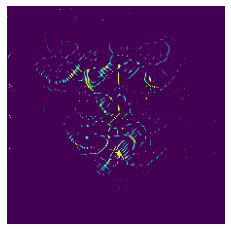

In [36]:
reverse_engineer(train_model, train_data_bad_loader)